In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_table = pd.read_csv('Flow_BEL_street_30min.csv')

In [4]:
new_table

,datetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,5187.0,5188.0,5189.0,5190.0,5191.0,5192.0,5193.0,5194.0,5195.0,5196.0
0,2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-01 01:30:00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2019-01-01 02:00:00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,2019-02-28 21:30:00,1.0,2.0,2.0,3.0,11.0,0.0,0.0,0.0,2.0,...,2.0,8.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,3.0
2828,2019-02-28 22:00:00,2.0,4.0,3.0,1.0,10.0,0.0,0.0,0.0,4.0,...,10.0,3.0,0.0,4.0,0.0,1.0,2.0,1.0,1.0,1.0
2829,2019-02-28 22:30:00,2.0,8.0,1.0,0.0,8.0,0.0,0.0,0.0,5.0,...,21.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
2830,2019-02-28 23:00:00,4.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,5.0,...,10.0,5.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0


In [5]:
new_table['Datetime'] = pd.to_datetime(new_table['datetime'])

DATAFRAME = new_table
DATAFRAME = DATAFRAME.drop(['datetime'],axis=1) 
DATAFRAME = DATAFRAME[DATAFRAME.columns.intersection(STREETS)]

DATAFRAME['Total'] = DATAFRAME.sum(axis=1)
# Auxiliary

DATAFRAME['minutes'] = new_table['Datetime'].dt.minute
DATAFRAME['hour'] = new_table['Datetime'].dt.hour

DATAFRAME['hour_x']=np.sin(DATAFRAME.hour*(2.*np.pi/23))
DATAFRAME['hour_y']=np.cos(DATAFRAME.hour*(2.*np.pi/23))

DATAFRAME['day'] = new_table['Datetime'].dt.day
DATAFRAME['DayOfWeek'] = new_table['Datetime'].dt.dayofweek

DATAFRAME['WorkingDays'] = DATAFRAME['DayOfWeek'].apply(lambda y: 2 if y < 5 else y)
DATAFRAME['WorkingDays'] = DATAFRAME['WorkingDays'].apply(lambda y: 1 if y == 5 else y)
DATAFRAME['WorkingDays'] = DATAFRAME['WorkingDays'].apply(lambda y: 0 if y == 6 else y)

DATAFRAME = DATAFRAME.drop(['minutes','hour','day'],axis=1)

feat_time = 4

DATAFRAME.head()

,1.0,8.0,12.0,18.0,19.0,20.0,22.0,23.0,27.0,33.0,...,5185.0,5186.0,5187.0,5188.0,5190.0,Total,hour_x,hour_y,DayOfWeek,WorkingDays
0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,1.0,2248.0,0.000000,1.000000,1,2
1,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,2232.0,0.000000,1.000000,1,2
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,2289.0,0.269797,0.962917,1,2
3,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,...,2.0,0.0,1.0,0.0,0.0,2421.0,0.269797,0.962917,1,2
4,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,2.0,0.0,0.0,1893.0,0.519584,0.854419,1,2


In [47]:
DATAFRAME.dropna(axis=0, how='any', inplace=True)

column_names = ['hour_x', 'hour_y', 'DayOfWeek', 'WorkingDays']
X = DATAFRAME[column_names]
y = DATAFRAME['Total']

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
DATAFRAME['predicted'] = model.predict(X)

In [48]:
print("Model Score: ", model.score(X, y))

Model Score:  0.7330482275886632


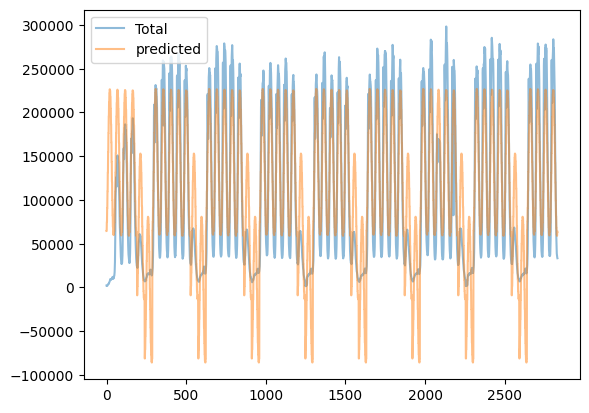

In [49]:
DATAFRAME[['Total', 'predicted']].plot(alpha=0.5);

In [8]:
DATAFRAME['predicted']

0       64518.781695
1       64518.781695
2       74936.500829
3       74936.500829
4       90417.985547
            ...     
2827    60708.378704
2828    59113.522059
2829    59113.522059
2830    63694.841039
2831    63694.841039
Name: predicted, Length: 2832, dtype: float64

In [9]:
params = pd.Series(model.coef_, index=X.columns)
params

hour_x         27796.919233
hour_y        -78694.352933
DayOfWeek       -411.970328
WorkingDays    71812.552478
dtype: float64

In [10]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [11]:
print(pd.DataFrame({'effect': params.round(0),
                    'uncertainty': err.round(0)}))

              effect  uncertainty
hour_x       27797.0       1230.0
hour_y      -78694.0       1342.0
DayOfWeek     -412.0        361.0
WorkingDays  71813.0        645.0


# Lasso 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
 
y_pred = lasso.predict(X_test)

In [43]:
print("Model Score: ", lasso.score(X_test, y_test))
 
lasso.coef_

Model Score:  0.7595797419429361


array([ 19749.83092444, -56183.35994856,  -5877.83277665,  44656.65720105])

In [44]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)

lasso_cv.fit(X, y)

lasso_cv.score(X, y)

0.7347610711484147

In [45]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
 
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, y_train)
 
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

Best Parameters: {'alpha': 1}
Best Score: 0.7201996717134683
